In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
%load_ext pycodestyle_magic
%pycodestyle_on
%load_ext nb_black

<IPython.core.display.Javascript object>

In [4]:
df = pd.read_csv("./data/developer_survey_2020/survey_results_public.csv")

<IPython.core.display.Javascript object>

In [5]:
schema = pd.read_csv("./data/developer_survey_2020/survey_results_schema.csv")

<IPython.core.display.Javascript object>

In [6]:
# Understand numeric data distribution
df.describe()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64461.000000,45446.000000,3.482600e+04,3.475600e+04,41151.000000
mean,32554.079738,30.834111,3.190464e+242,1.037561e+05,40.782174
std,18967.442360,9.585392,inf,2.268853e+05,17.816383
min,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,16116.000000,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,32231.000000,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,49142.000000,35.000000,1.250000e+05,9.500000e+04,44.000000
max,65639.000000,279.000000,1.111111e+247,2.000000e+06,475.000000


<IPython.core.display.Javascript object>

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'CompTotal'}>],
       [<AxesSubplot:title={'center':'ConvertedComp'}>,
        <AxesSubplot:title={'center':'WorkWeekHrs'}>]], dtype=object)

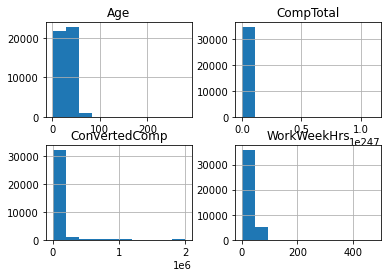

<IPython.core.display.Javascript object>

In [7]:
# Quick histogram to check the distribution of numeric features
df[["Age", "CompTotal", "ConvertedComp", "WorkWeekHrs"]].hist()

We are interested in looking at NEWOvertime feature in the dataset which describe how frequently people do overtime.

In [8]:
# unique overitmes
df["NEWOvertime"].unique()

array(['Often: 1-2 days per week or more', nan,
       'Occasionally: 1-2 days per quarter but less than monthly',
       'Never', 'Sometimes: 1-2 days per month but less than weekly',
       'Rarely: 1-2 days per year or less'], dtype=object)

<IPython.core.display.Javascript object>

In [9]:
df.MainBranch.unique()

array(['I am a developer by profession', 'I code primarily as a hobby',
       'I used to be a developer by profession, but no longer am',
       'I am not primarily a developer, but I write code sometimes as part of my work',
       'I am a student who is learning to code', nan], dtype=object)

<IPython.core.display.Javascript object>

In [10]:
to_ananlyse = "Often: 1-2 days per week or more"

<IPython.core.display.Javascript object>

We are interested in ananlysing employees doing 1-2 days overtime every week

Sometimes: 1-2 days per month but less than weekly          17.913157
Often: 1-2 days per week or more                            17.106467
Occasionally: 1-2 days per quarter but less than monthly    14.687951
Rarely: 1-2 days per year or less                           10.038628
Never                                                        7.319154
Name: NEWOvertime, dtype: float64


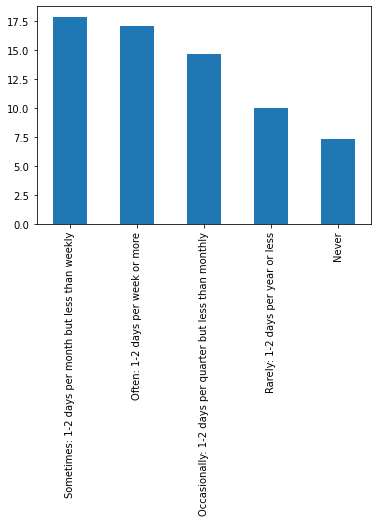

3:80: E501 line too long (85 > 79 characters)
5:80: E501 line too long (88 > 79 characters)


<IPython.core.display.Javascript object>

In [11]:
# Q1.a What percent of all repondent do overtime 1-2 days a week.
(
    df[df["NEWOvertime"].notnull()]["NEWOvertime"].value_counts() / df.shape[0] * 100
).plot.bar()
print(df[df["NEWOvertime"].notnull()]["NEWOvertime"].value_counts() / df.shape[0] * 100)

In [12]:
df.MainBranch.value_counts() / df.shape[0] * 100

I am a developer by profession                                                   73.211709
I am a student who is learning to code                                           12.364065
I am not primarily a developer, but I write code sometimes as part of my work     8.535393
I code primarily as a hobby                                                       3.589767
I used to be a developer by profession, but no longer am                          1.835218
Name: MainBranch, dtype: float64

<IPython.core.display.Javascript object>

In [13]:
# progessional developers
dev = df[df["MainBranch"] == "I am a developer by profession"]

<IPython.core.display.Javascript object>

Sometimes: 1-2 days per month but less than weekly          21.963003
Often: 1-2 days per week or more                            20.386498
Occasionally: 1-2 days per quarter but less than monthly    18.312038
Rarely: 1-2 days per year or less                           12.734940
Never                                                        9.310703
Name: NEWOvertime, dtype: float64


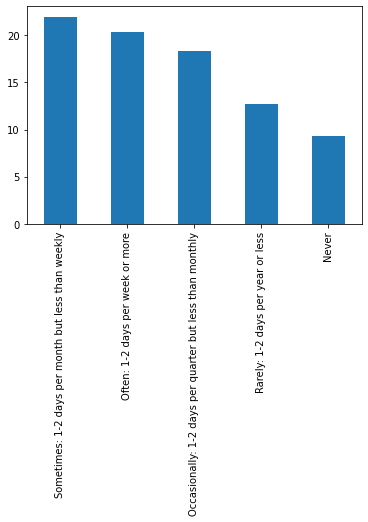

3:80: E501 line too long (88 > 79 characters)
6:80: E501 line too long (88 > 79 characters)


<IPython.core.display.Javascript object>

In [14]:
# Q1.b What percent of dev do overtime 1-2 days a week.
(
    dev[dev["NEWOvertime"].notnull()]["NEWOvertime"].value_counts() / dev.shape[0] * 100
).plot.bar()
print(
    dev[dev["NEWOvertime"].notnull()]["NEWOvertime"].value_counts() / dev.shape[0] * 100
)

In [15]:
def get_overtime_df(df, to_group_by, overtime_freq):
    """ This function returns overtime percetange based on groupby column"""
    overtime_df = (
        df[df.NEWOvertime == overtime_freq]
        .groupby(to_group_by)["NEWOvertime"]
        .value_counts()
        .sort_values(ascending=False)
    )
    overtime_df = overtime_df / df.shape[0] * 100
    overtime_df = pd.DataFrame(overtime_df)
    overtime_df[to_group_by] = overtime_df.index.get_level_values(0)
    overtime_df.reset_index(drop=True, inplace=True)
    overtime_df = overtime_df.rename(columns={"NEWOvertime": "1-2 days overtime/week"})
    return overtime_df

13:80: E501 line too long (87 > 79 characters)


<IPython.core.display.Javascript object>

   1-2 days overtime/week                                            OrgSize
0                3.586665                                 20 to 99 employees
1                2.829618                               100 to 499 employees
2                2.216844                                   2 to 9 employees
3                2.198228                           10,000 or more employees
4                1.703356                                 10 to 19 employees
5                1.531158                           1,000 to 4,999 employees
6                1.177456  Just me - I am a freelancer, sole proprietor, ...
7                0.963373                               500 to 999 employees
8                0.589504                           5,000 to 9,999 employees


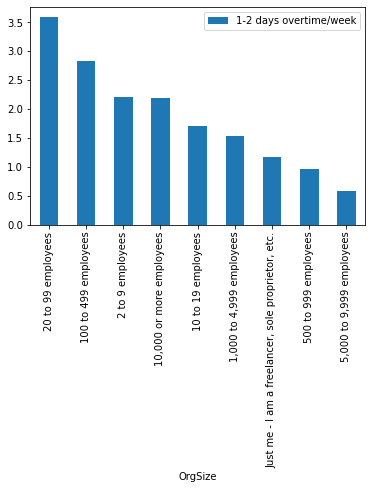

<IPython.core.display.Javascript object>

In [16]:
# Q2.a Do people overtime more frequently in small organizations
org_overtime = get_overtime_df(df, "OrgSize", to_ananlyse)
org_overtime.plot(x="OrgSize", y=["1-2 days overtime/week"], kind="bar")
print(org_overtime)

   1-2 days overtime/week                                            OrgSize
0                4.475240                                 20 to 99 employees
1                3.371263                               100 to 499 employees
2                2.782192                                   2 to 9 employees
3                2.487657                           10,000 or more employees
4                2.102007                                 10 to 19 employees
5                1.650669                           1,000 to 4,999 employees
6                1.411226  Just me - I am a freelancer, sole proprietor, ...
7                1.131524                               500 to 999 employees
8                0.646282                           5,000 to 9,999 employees


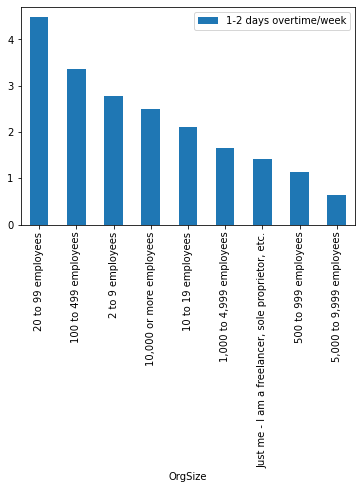

<IPython.core.display.Javascript object>

In [17]:
# Q2.b Do people overtime more frequently in small organizations
dev_overtime_org = get_overtime_df(dev, "OrgSize", to_ananlyse)
dev_overtime_org.plot(x="OrgSize", y=["1-2 days overtime/week"], kind="bar")
print(dev_overtime_org)

   1-2 days overtime/week                                         Employment
0               14.179116                                 Employed full-time
1                2.412311  Independent contractor, freelancer, or self-em...
2                0.468500                                 Employed part-time


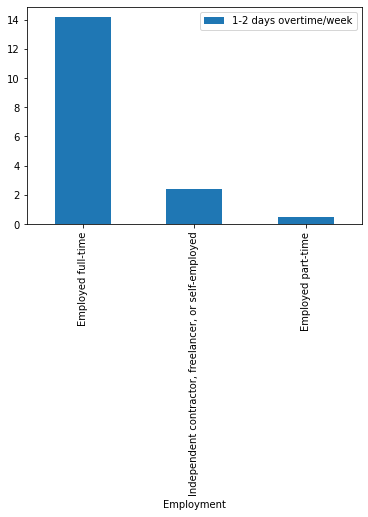

4:80: E501 line too long (82 > 79 characters)


<IPython.core.display.Javascript object>

In [18]:
# Q3.a Which employement status works overtime more freqeuntly ?
# Do parttime employee work overtime to make to employment full time ?
employment_overtime = get_overtime_df(df, "Employment", to_ananlyse)
employment_overtime.plot(x="Employment", y=["1-2 days overtime/week"], kind="bar")
print(employment_overtime)

   1-2 days overtime/week                                         Employment
0               16.894455                                 Employed full-time
1                2.911449  Independent contractor, freelancer, or self-em...
2                0.531859                                 Employed part-time


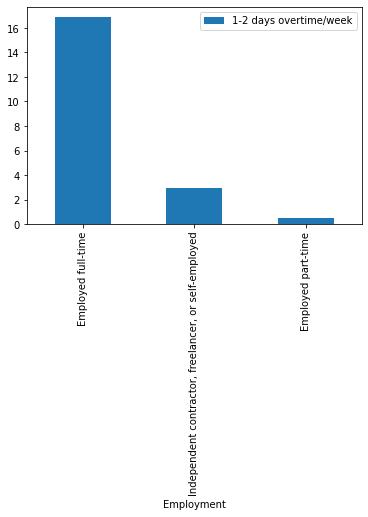

3:80: E501 line too long (86 > 79 characters)


<IPython.core.display.Javascript object>

In [19]:
# Q3.b Which employement status works overtime more freqeuntly ?
dev_employment_overtime = get_overtime_df(dev, "Employment", to_ananlyse)
dev_employment_overtime.plot(x="Employment", y=["1-2 days overtime/week"], kind="bar")
print(dev_employment_overtime)

     1-2 days overtime/week         Country
0                  3.219001   United States
1                  2.438684           India
2                  1.152635         Germany
3                  0.958719  United Kingdom
4                  0.606568          France
..                      ...             ...
152                0.001551            Fiji
153                0.001551          Gambia
154                0.001551          Guyana
155                0.001551           Haiti
156                0.001551         Namibia

[157 rows x 2 columns]


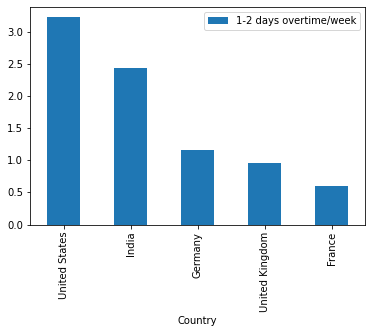

3:80: E501 line too long (84 > 79 characters)


<IPython.core.display.Javascript object>

In [20]:
# Q4.a Which country works overtime more freqeuntly ?
country_overtime = get_overtime_df(df, "Country", to_ananlyse)
country_overtime.head(5).plot(x="Country", y=["1-2 days overtime/week"], kind="bar")
print(country_overtime)

     1-2 days overtime/week            Country
0                  3.695463      United States
1                  3.125464              India
2                  1.328587            Germany
3                  1.091264     United Kingdom
4                  0.731041             France
..                      ...                ...
148                0.002119           Djibouti
149                0.002119             Gambia
150                0.002119  Brunei Darussalam
151                0.002119         Tajikistan
152                0.002119      Liechtenstein

[153 rows x 2 columns]


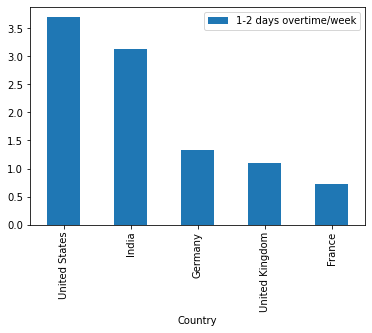

3:80: E501 line too long (88 > 79 characters)


<IPython.core.display.Javascript object>

In [21]:
# Q4.b Which country works overtime more freqeuntly ?
dev_country_overtime = get_overtime_df(dev, "Country", to_ananlyse)
dev_country_overtime.head(5).plot(x="Country", y=["1-2 days overtime/week"], kind="bar")
print(dev_country_overtime)

In [22]:
def get_gender_df(df):
    """ This function parsed Gender column into 3 categories"""
    man_woman_df = df[(df.Gender == "Man") | (df.Gender == "Woman")]
    no_binary_df = df[(df.Gender != "Man") | (df.Gender != "Woman")]
    no_binary_df["Gender"] = no_binary_df["Gender"].str.split(";").str[0]
    return pd.concat([man_woman_df, no_binary_df])

<IPython.core.display.Javascript object>

In [23]:
gender_df = get_gender_df(df)
# gender proportion in the dataset
gender_df["Gender"].value_counts() / gender_df.shape[0] * 100

Man                                                  80.605854
Woman                                                 6.894802
Non-binary, genderqueer, or gender non-conforming     0.336780
Name: Gender, dtype: float64

<IPython.core.display.Javascript object>

   1-2 days overtime/week                                             Gender
0               16.098952                                                Man
1                1.125807                                              Woman
2                0.047237  Non-binary, genderqueer, or gender non-conforming


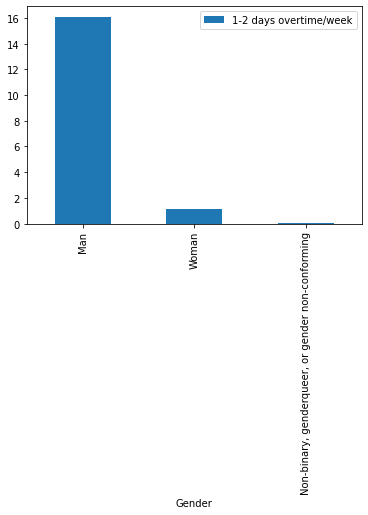

3:80: E501 line too long (82 > 79 characters)


<IPython.core.display.Javascript object>

In [24]:
# Q5.a Do Man work overtime more frequently
gender_overtime = get_overtime_df(gender_df, "Gender", to_ananlyse)
gender_overtime.head(5).plot(x="Gender", y=["1-2 days overtime/week"], kind="bar")
print(gender_overtime)

   1-2 days overtime/week                                             Gender
0               19.143233                                                Man
1                1.296298                                              Woman
2                0.053370  Non-binary, genderqueer, or gender non-conforming


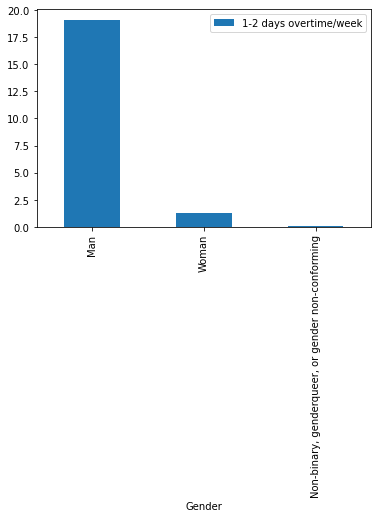

4:80: E501 line too long (86 > 79 characters)


<IPython.core.display.Javascript object>

In [25]:
# Q5.b Do professional man developers work overtime more frequently
dev_gend_df = get_gender_df(dev)
dev_gender_overtime = get_overtime_df(dev_gend_df, "Gender", to_ananlyse)
dev_gender_overtime.head(5).plot(x="Gender", y=["1-2 days overtime/week"], kind="bar")
print(dev_gender_overtime)